In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv("sample inventory table.csv")

In [3]:
df1.head()

,timestamp,type,status,box
0,23/4/2021,moderna,in,1000
1,23/4/2021,moderna,in,1001
2,23/4/2021,moderna,in,1002
3,23/4/2021,moderna,in,1003
4,23/4/2021,moderna,in,1004


In [4]:
df1.tail()

,timestamp,type,status,box
55,7/5/2021,pfizer,in,1501
56,7/5/2021,pfizer,in,1502
57,7/5/2021,pfizer,in,1503
58,7/5/2021,pfizer,in,1504
59,7/5/2021,pfizer,in,1505


In [5]:
# Distribution of the Two Vaccine Types

df1.groupby('type').count()

,timestamp,status,box
type,,,
moderna,47,47,47
pfizer,13,13,13


<AxesSubplot:xlabel='type', ylabel='Count'>

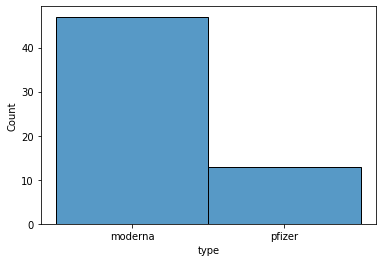

In [6]:
sns.histplot(data=df1,x='type',stat='count')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  60 non-null     object
 1   type       60 non-null     object
 2   status     60 non-null     object
 3   box        60 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [8]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%d/%m/%Y')

In [9]:
# drop duplicates in case boxes were scanned more than once 
# for either in or out by mistake

df1.drop_duplicates(subset=['status','type','box'],keep='first',inplace=True)

In [10]:
# Remove those boxes which have been checked out
# Methodogy is convert all the status 'out' entries into 'in' which forces
# the corresponding in to become duplicate entries.  Then we do a 
# remove duplicate with keep=False to drop all duplicates
# Hence, whatever remains in the dataframe df1 represents boxes that are checked 
# into the fridge and not yet checked out, ie real physical inventory

df1.loc[df1['status']=='out','status']='in'
df1.drop_duplicates(subset=['status','type','box'],keep=False,inplace=True)

### Processing & Visualisation for Moderna Vaccine

Moderna vaccine can be stored at 2 to 8 degrees for up to 30 days

In [11]:
# Filtering out the Moderna Vaccine into dataframe df2

# df2 = df1[df1['type']=='moderna']


df2 = df1.loc[df1['type']=='moderna',:]

In [12]:
df2

,timestamp,type,status,box
10,2021-04-23,moderna,in,1010
11,2021-04-23,moderna,in,1011
12,2021-04-23,moderna,in,1012
13,2021-04-23,moderna,in,1013
14,2021-04-23,moderna,in,1014
15,2021-04-23,moderna,in,1015
16,2021-04-23,moderna,in,1016
17,2021-04-23,moderna,in,1017
18,2021-04-23,moderna,in,1018
19,2021-04-23,moderna,in,1019


In [13]:
currentDate = pd.to_datetime("28/5/2021", format='%d/%m/%Y')

In [14]:
df2['ElapsedDays'] = currentDate - df2['timestamp']

<ipython-input-14-535364ac3e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ElapsedDays'] = currentDate - df2['timestamp']


In [15]:
df2.head()

,timestamp,type,status,box,ElapsedDays
10,2021-04-23,moderna,in,1010,35 days
11,2021-04-23,moderna,in,1011,35 days
12,2021-04-23,moderna,in,1012,35 days
13,2021-04-23,moderna,in,1013,35 days
14,2021-04-23,moderna,in,1014,35 days


In [16]:
df2['ElapsedDays'] = df2['ElapsedDays'].dt.days.astype('int16')

<ipython-input-16-90c6ce392f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ElapsedDays'] = df2['ElapsedDays'].dt.days.astype('int16')


In [17]:
df2['RemainDays'] = 30 - df2['ElapsedDays']

<ipython-input-17-92bb5608371e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RemainDays'] = 30 - df2['ElapsedDays']


In [18]:
# checking on the overall statistics

df2.describe()

,box,ElapsedDays,RemainDays
count,27.000000,27.000000,27.000000
mean,1190.740741,30.407407,-0.407407
std,198.528741,5.773009,5.773009
min,1010.000000,21.000000,-5.000000
25%,1016.500000,26.500000,-5.000000
50%,1102.000000,34.000000,-4.000000
75%,1325.000000,35.000000,3.500000
max,1505.000000,35.000000,9.000000


In [19]:
# Displaying the inventory stock level

# total number of boxes in stock

total_stock = df2['box'].count()
print("Total number of boxes in stock:",total_stock)

# check for expired stock ie ElapsedDays >30

expired=df2.loc[df2['ElapsedDays']>30, 'box'].count()
print('Number of Expired boxes:',expired)

# check for number of unexpired inventory

valid_stock = total_stock - expired
print('Total number of unexpired valid stock:',valid_stock)

# mean and median of inventory

ElapsedDays_mean = df2['ElapsedDays'].mean()
ElapsedDays_median = df2['ElapsedDays'].median()

print(f'The mean and median of Elapsed Days are {ElapsedDays_mean:.2f} and {ElapsedDays_median:.2f} respectively')

Total number of boxes in stock: 27
Number of Expired boxes: 16
Total number of unexpired valid stock: 11
The mean and median of Elapsed Days are 30.41 and 34.00 respectively


In [20]:
# Tabulate breakdown of inventory according to ElapsedDays

df2.groupby('ElapsedDays').agg({'ElapsedDays':'count'})

,ElapsedDays
ElapsedDays,
21,6
26,1
27,1
28,1
29,1
30,1
34,5
35,11


<AxesSubplot:xlabel='RemainDays', ylabel='Count'>

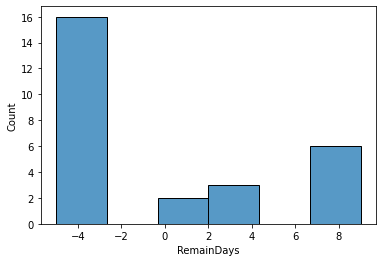

In [21]:
# Visualising the breakdown in Days Remaining vs box count
# Negative values mean vaccine expired

sns.histplot(data=df2,x='RemainDays',stat='count')

### Processing & Visualisation for Pfizer Vaccine

Pfizer vaccine can be stored at 2 to 8 degrees for up to 5 days

In [22]:
# Filtering out the Pfizer Vaccine into dataframe df3

df3 = df1[df1['type']=='pfizer']

In [23]:
currentDate = pd.to_datetime("7/5/2021", format='%d/%m/%Y')

In [24]:
df3['ElapsedDays'] = currentDate - df3['timestamp']

<ipython-input-24-a66c9cadef46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ElapsedDays'] = currentDate - df3['timestamp']


In [25]:
df3.head()

,timestamp,type,status,box,ElapsedDays
49,2021-04-30,pfizer,in,1310,7 days
50,2021-05-01,pfizer,in,1320,6 days
51,2021-05-02,pfizer,in,1330,5 days
54,2021-05-07,pfizer,in,1500,0 days
55,2021-05-07,pfizer,in,1501,0 days


In [26]:
df3['ElapsedDays'] = df3['ElapsedDays'].dt.days.astype('int16')

<ipython-input-26-3163159dd63b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ElapsedDays'] = df3['ElapsedDays'].dt.days.astype('int16')


In [27]:
df3['RemainDays'] = 5 - df3['ElapsedDays']

<ipython-input-27-9895a1eaaa99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['RemainDays'] = 5 - df3['ElapsedDays']


In [28]:
# checking on the overall statistics

df3.describe()

,box,ElapsedDays,RemainDays
count,9.000000,9.000000,9.000000
mean,1441.666667,2.000000,3.000000
std,91.398851,3.041381,3.041381
min,1310.000000,0.000000,-2.000000
25%,1330.000000,0.000000,0.000000
50%,1501.000000,0.000000,5.000000
75%,1503.000000,5.000000,5.000000
max,1505.000000,7.000000,5.000000


In [29]:
# Displaying the inventory stock level

# total number of boxes in stock

total_stock = df3['box'].count()
print("Total number of boxes in stock:",total_stock)

# check for expired stock ie ElapsedDays >5

expired=df3.loc[df3['ElapsedDays']>5, 'box'].count()
print('Number of Expired boxes:',expired)

# check for number of unexpired inventory

valid_stock = total_stock - expired
print('Total number of unexpired valid stock:',valid_stock)

# mean and median of inventory

ElapsedDays_mean = df3['ElapsedDays'].mean()
ElapsedDays_median = df3['ElapsedDays'].median()

print(f'The mean and median of Elapsed Days are {ElapsedDays_mean:.2f} and {ElapsedDays_median:.2f} respectively')

Total number of boxes in stock: 9
Number of Expired boxes: 2
Total number of unexpired valid stock: 7
The mean and median of Elapsed Days are 2.00 and 0.00 respectively


In [30]:
# Tabulate breakdown of inventory according to ElapsedDays

df3.groupby('ElapsedDays').agg({'ElapsedDays':'count'})

,ElapsedDays
ElapsedDays,
0,6
5,1
6,1
7,1


<AxesSubplot:xlabel='RemainDays', ylabel='Count'>

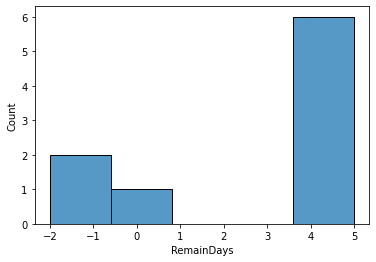

In [31]:
# Visualising the breakdown in Days Remaining vs box count
# Negative values mean vaccine expired

sns.histplot(data=df3,x='RemainDays',stat='count')